**Chapter 3 - Linear Regression**

Regression is the act of fitting a model to a dataset. We try to fit the model as closely to our data as possible. Close can be considered in different ways, however, generally we can try to optimize for the least squares. 

On averages, we want the smallest Residual Sum of Squares. Sum of squares between the predicted values and the Y true values: 
* $RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

So in our regression we need to pick betas in $y = \beta_0 + \beta_1 x + \epsilon$ which minimize the RSS. 

Our intercept term represent the value of Y if all other Xs are 0. 

*Law of Law Numbers* - As we take increasing samples, the sample statistic will begin to resemble the population statistic. 
*Central Limit Theorum* - As we continue taking sample means, the sampled means will begin to follow a normal distribution. 

When we fit a regression model, we have no guarantee that our coefficients will actually be the true coeffcients. However, if we conduct many regressions with multiple datasets and average the coefficients we can likely get close to the true coefficient values. 

The Standard Error tells how far away our sample mean is likely away from the true population mean. SE is simply the sample standard deviation divided by the square root of N. Intuitively the more N or samples we have the less standard error we'll have. More sample greater likelihood our sample mean is representative of the poplation mean. 

Similarly, we can compute the SE of our coefficient as well to gain a sense of whether or not they're representative of the population coefficient. 
* $SE(\hat{\beta}_1) = \sqrt{\frac{MSE}{\sum(x_i - \bar{x})^2}}$

Standard Errors will also help us calculate confidence intervals. Confidence Intervals are ways of expressing a statistic with a margin of error. 
Confidence Interval = Significant Level * Standard Error
Sig Level is determined by the confidence we want to have for 95 percent, 1.96
Standard Error is the Population Standard Deviation / sqrt of N. 
Then 95% of the time the statistic should be represented without our window. 

*How to frame the utility of Confidence Intervals for regression?*
* If we determine that for Beta1 which is advertising budget and our Y is total sales. If we estimate a confidence intevals for Beta1 of [5,10] then we could say that 1 extra dollar of advertising should lead to between 5 and 10 extra dollars in sales. 

*Purpose of coefficient values for Hypothesis testing?*
* If we want to test whether or not some variable Beta1 has an influence on the outcome variable we could say that if Beta1 is 0 then the model is telling us there is no relationship. So how big of a coefficient would we need to determine that there is a relationship? One thing to consider is the standard error of the coefficient. A large standard error would suggest that we need a larger coefficient to be sure there is a relationship. A smaller SE would mean smaller coefficients are ok to show relationships. We can calulate the t-statistic, 
    * T = ( Beta1 - 0 ) / Standard Error
The t statistic tells us how many standard deviations away the statistic is from the mean. Using the T statistic, we can then compute the Pvalue. 
The Pvalue tell us that given the H0 or null hypothesis is true. What are the chances that we would see data like this? If the pvalue is under 0.05 we reject as is seems Beta 1 does have an impact. 

* Type 1 Error = Alpha  = False Positive 
    * The risk we're willing to take of a false postive. Or in other words, rejective the null hypothesis when we shouldnt have. 
* Typer 2 Error = Beta = False Negative  
    * Typically used to help determine power which is 1- beta, and we typically go for ROT 80% desired power. This means chances of a false negative are 20? 

Remember power is a signal of how strong your test is. More specifically, it is the likelihood of if there is a positive effect, what are the odds that your test will be able to detect such. Power is a function of

    * Sample Size - the larger the sample size the greater our power, intuitive
    * Effect Size - how large of an impact we're trying to see 
    * Significant Level - typically 0.05
    * Population or sample variance - greater variance will reduce power



**Assessing the extent to which the model fits the data**

Once we have determined which coefficients indeed have an impact on the Y outcome variable we want to quantify how well our model actually does. MSE can tell us something, but its not an intuitive metric to see how well does our model actually model Y? 

We can look at two unrelated quantities: 
* RSE - Residual Standard Error 
    * Even if we had perfect coefficients we still wouldnt be able to perfectly model Y.
    * Essentially the standard deviation of our errors. It is known as a measure of the lack of fit. 
    * Expressed in actual terms of Y. 
    * So the output number here and whether or not the RSE is exceptable depends on the context of the problem. 
* $R^2$ 
    * How much of the variance of Y is our model able to explain. 
    * Unlike RSE which is expressed in unit of Y, the $R^2$  is able to provide a number between 0-1. 

**Multiple Linear Regression**

In the real world we likely have access to multiple predictors we could use to model Y. Instead of running n simple linear regressions we can run multiple linear regression to capture all of these predictors. This has several benefits over using multiple simple linear regression, as when we just have one predictor the coefficient ignore the influence of the other predictors on the outcome variable Y. The simpsons paradox also describes that some variables and their relationship with Y might become completely diminished after introducing other variables. We're also able to still model the influence of one coefficient while keeping others constant. 

To find the optimal coefficients, we select them using least squares or the coefficients that minimize the Square Sum of Residuals. 

The benefit is also that by introducing more predictors we can eliminate some of the chances of confounding variables. 


Questions we care about in multiple regression? 

1. Is at least one of the predictors useful in predicting out outcome variable? 

We essentially have to conduct a test to determine whether or not all parameters are 0. Quick refresh on the different types of test: 
z-test: when we want to test a single metric and the population variance is known (unlikely in real world)
t-test: tests single parameter when the population variance is unknown (as population is unknown this one has heavier tails)
f-tests: tests ratio of variances of multiple paramters

The f-test in multiple regression can help us compare the variance explained by our model and the variance left over. A large f test statistic and a corresponding p-value less than 0.05 will lead us to reject the null hypothesis. 

2. Do all of them help or just a subset of predictors? 

Once we determine that our variable are useful, we need to conduct variable selection (or feature engineering in ML). Why? At scale having lots of features might become computationally expensive and we might lose interpretability. There different approached to conduct variable selection: 

Forward selection: We can do many simple linear regressions, between each predictor and outcome, then add the paramter to our model step wise starting with the parameter which had the lowest Pvalue. Continue adding until some stopping criteria is met like no more parameter with Pvalue less than 0.05. Or stop when error or loss stops improving. 

Backward Selection: The opposite, we start with all possible paramters and will continuously remove paramters from our model until a stopping criteria is met. 

Mixed Selection: This is like forward selection but we mix in backwards selection. Since Pvalues of the paramter can change once they are included in a model with other features. So we can add but every know an then reevaluate the pvalues of the parameters. 

3. How well does the model fit the data? 

For regression, the R2 metric is very insightful and can be used to compare models and their predictors. Some predictors might not lead to very signification jumps in R2. What's very interesting is that the R2 is essentially the squared correlation between our Y pred and the true Y. Squared because corr is -1 to 1. 

4. Given a subset of predictors, what is worth predicting? 

The issue is that we have to make an assumption that the model we're using is the one which best represent the real life model (which is most likely way more complex than a linear model).

Remember we can calculate confidence intervals of our Parameters, similarly we can calculate prediciton intervals

**How to deal with Qualitative Variables?**



For example, if trying to predict things like credit score we might encounter a dummy variable such as a binary owns a home or doesnt own a home variable. We could encode these using two different  

* In 0/1 encoding the intercept would be the value the credit score without home owndership, the B1 would be the impact on credit score with home ownership. (Recommended)
* You could also do -1 and 1, then intercept is the average credit score amongst homeowners and non homeowners, B1 represent half the difference between two groups. 

What if we have more than two variables? Perhaps what about if someone if form the North, South, East, or West? Here we could use 3 dummy variables with all 0/1 for North, South, East. If all of them are off we could assume the baseline is west. Then each parameter represents the different between West and each respective cardinal direction. 

**Extending our Linear Regression Concepts**

So far two big assumptions of our linear models have been their additive nature and the linear form. 

One way which we can remove the additive assumption or add a way to capture non additive information is by the inclusion of an interaction term. In our current state, some paramters might be influenced by each other. For example, if we are trying to predict credit card balance using predictors of income and binary student, adding an interaction terms such as (income x Student) would allow us to model that someone's income probably has varying effect on they credit balance depending whether or not they're a student. 

The Second was is extending our regression to become polynomial regression. By adding polynomial terms to our model like income squared we can capture non linear relationships. 

**Common Issues during Regression**

1. Non Linearity of the response predictor relationship. Not all data relationships will be linear. A simple way to test this is to plot the residuals for the fitted value. If there is a relationship of the points here then there should be no discernable relationship. Typically adding polynomial terms to the model function will help. 

2. Correlation of the error terms. Occure frequently in time-series dats when one prediction error sheds light on what the next error might be. What helps here is doing a log transformation of the outcome variable.  

3. Variance of the Error terms. We'd like to hope that the variance of the error terms is constant across all ranges of Y (high and low Y values). You could apply log or tranform the Y outcome variable, or we could think about a WLS, weight regression which penalizes noisy data and observations. 

4. Outliers, occur when our predicted Y is unreasonably far away from the true Y. This could be due to either missing or incomplete data, or missing a predictor entirely, or it could be becuase the model isnt complex enough. To remove outliers is tricky, first you can visualize them in a residuals plot. One option is to use box plots, rule of thumb is to remove points which are greater than 1.5*IQR + Q3 or less than Q1-1.5*IQR. Or studentizes residuals.

5. High Leverage Points. Essentially an outlier of our training data or an observation of X. Calculate an H statistic. 

6. Colinearity of the predictors. If two variables describe a lot about each other and move similarly, then its very difficult to seperate them in modeling to determine how much each one is associated with Y. To try to see colinearity we could of course look at a correlation matric and try to see which one have a high absolute value. However, there is something called multi colinearity which is relationships between three or more predictors which might not show within a corr matrix. What is preferred is to use the VIF (Variance inflation factor), helps tell us how important a variable really is or if its, being influenced by another.



**Comparing Linear Regression to KNN**

Size K Neighbors depends on the Bias VAriance tradeoff. More K, increases bias. Less K Increases Variance. Should we pick a linear model (parametric) or KNN (non-parametric) model? It depends on what the true form is of f(x), we can tell which one is better by looking at a plot of residuals, and the MSE. 

KNN does well when there are few predictors although the parametric regression offers a nice interpretability advantage. KNN may not perform well when there are many predictors due to the curse of dimensionality. When you have to speard one data across so many features there may be no nearby observation that helps provide good indicators. 



---


**LAB**

In [ ]:
import numpy as np 
import pandas as pd 

pd.set_option('display.precision', 2)  # Show 2 decimal places


In [2]:
import statsmodels.api as sm

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.stats.anova import anova_lm

In [6]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, 
                  summarize, 
                  poly)

In [8]:
#inspecting namespace and objects, builtin has print etc. 
dir()

['In',
 'MS',
 'Out',
 '_',
 '_7',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__vsc_ipynb_file__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'summarize',
 'vif']

In [9]:
# we'll use the boston housing dataset,

boston_df = load_data("Boston")

In [10]:
boston_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [20]:
display(boston_df.info())

display(boston_df.head(4))

display(boston_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


None

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,6.32e-03,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,4.98,24.0
1,2.73e-02,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,9.14,21.6
2,2.73e-02,0.0,7.07,0,0.47,7.18,61.1,4.97,2,242,17.8,4.03,34.7
3,3.24e-02,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,2.94,33.4


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,37.97,50.00


Our targer will be medv, which is the median home value in the $000's. 
Out main predictor will first be LSTAT, which is % lower status of the population. 

In [21]:
initial_x_matrix = pd.DataFrame({ 'intercept' : np.ones(boston_df.shape[0])   ,
                                 'lstat' : boston_df['lstat']})

# check to make sure it worked 
initial_x_matrix.iloc[:5]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33


In [22]:
# create the model and train it using fit
y = boston_df['medv']
model = sm.OLS(y,initial_x_matrix)
results = model.fit()

In [27]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.55,0.56,61.41,0.0
lstat,-0.95,0.04,-24.53,0.0


In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 31 Aug 2025   Prob (F-statistic):           5.08e-88
Time:                        15:45:47   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# define a plotting functions 

def abline (ax, b, m,*args , **kwargs): 
    "Add a line with slop m and intercept B to ax"
    xlim = ax.get_xlim()
    ylim = [m  * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args , **kwargs)


**Multiple Linear Regression**
lets train a model on all predictors available

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat']

In [34]:
# make X equal to all columns other than our predictor 
Y = boston_df['medv']
X = MS(list(boston_df.loc[:, boston_df.columns != 'medv'].columns)).fit_transform(boston_df)

model = sm.OLS(Y, X)

results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
intercept,4.16e+01,4.94e+00,8.43,0.00e+00
crim,-1.21e-01,3.30e-02,-3.68,0.00e+00
zn,4.70e-02,1.40e-02,3.38,1.00e-03
indus,1.35e-02,6.20e-02,0.22,8.29e-01
chas,2.84e+00,8.70e-01,3.26,1.00e-03
nox,-1.88e+01,3.85e+00,-4.87,0.00e+00
rm,3.66e+00,4.20e-01,8.71,0.00e+00
age,3.60e-03,1.30e-02,0.27,7.87e-01
dis,-1.49e+00,2.02e-01,-7.39,0.00e+00
rad,2.89e-01,6.70e-02,4.33,0.00e+00


In [ ]:
#create a variance inflation factor DF. 
vif_values = [vif(X,i)
             for i in range(1,X.shape[1])]
vif_dataframe = pd.DataFrame({'vif' : vif_values}, 
                             index= X.columns[1:]
                             )

vif_dataframe

,vif
crim,1.77
zn,2.30
indus,3.99
chas,1.07
nox,4.37
rm,1.91
age,3.09
dis,3.95
rad,7.45
tax,9.00


In [ ]:
# to create interaction terms we could go like this 

X = MS(['lstat', 
        'age',
        ('lstat', 'age')]).fit_transform(boston_df)

# to create polynomial terms and introduce non linearity we could 

X = MS([poly('lstat', degree=2), 
        'age']).fit_transform(boston_df)

**Exercises**

Q1) the pvalues of the coefficients for a model correspond to the p value that where our null hypothesis is that the parameter = 0, that there is no relationship. In table 3.4, all parameter are highly significant where we'd reject the null hypothesis. One of the parameters however has a high pvalue of 0.85, we fail to reject the null hypothesis. Very important to not say that this means there is no relationship with the outcome variable. All it can help us conclude is that this study did no procide sufficient evidence for us to reject the null hypothesis. What could have gone wrong? 
* Insufficient statistical power - what was the power of the test? What was our training data size? 
* Small effect size, maybe the effect the variable has on the Y is very small.  

Better than looking at the pvalue for a coefficient is to look at the confidence interval of it. A pvalue cannot be significant if the confidence interval includes 0. 

Q2) difference between KNN Classifer and KNN Regression? Similar algorithm by looking at the closest K neighbors according to some distance metric. We then take the majority class or average value for regression. KNN is non parametric and doesnt assume a form. Knn when k is small has high variance, when K is large, large bias. Also very susceptible to the curse of dimensionality. Another point is that for training and for inference you essentially need to have all data in memory. 

Q3) For a dataset where the linear model is the true fit, will a linear model perform better than a cubic regression model? No, the cubic will always perform better than the linear model because it can be linear and non linear but only for the training data! It may well be that the cubic data is overfit and doesnt generalize well. 

Q4) When we regress X onto Y, we say the R2 is the square of the correlation between X and Y, how? R² measures how much of Y's variation is explained by the linear relationship with X, squaring the correlation gives us the proportion of variance explained.



In [ ]:
"""
Applied Q8) 
Perform a simple regression of MPG using only Horsepower. 

i.  Is there a relationship between the predictor and the response? 
seems to be given the low p value 
ii. How strong is the relationship between the predictor and the response? 
seems to be a low negative coefficient
iii. Is it a positive or negative relationship?  
negative coeff
iv. What is the predicted MPG with a 98 horsepower? (what are the confidence and prediction intervals?)

"""

In [77]:
auto_df = load_data("Auto")
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
# create our predixtors (x)
q8_x = pd.DataFrame({ 'intercept' : np.ones(auto_df.shape[0])   ,
                                 'horsepower' : auto_df['horsepower']})
# creat Y variable
q8_y = auto_df['mpg']


In [46]:
model = sm.OLS(q8_y, q8_x)

results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
intercept,39.94,7.17e-01,55.66,0.0
horsepower,-0.16,6.00e-03,-24.49,0.0


In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 01 Sep 2025   Prob (F-statistic):           7.03e-81
Time:                        21:15:54   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#predict mpg with a 98 horespower car
inference_df = pd.DataFrame({'intercept': [1], 'horsepower' : [98]})
# new_preds = results.predict(inference_df)
new_preds = results.get_prediction(inference_df)

# see result
new_preds.predicted_mean


array([24.46707715])

Applied Q9

In [ ]:
# calc confidence interval
print(new_preds.conf_int(alpha=0.05))

# calc prediction interval
print(new_preds.conf_int(obs= True, alpha=0.05))


[[23.97307896 24.96107534]]
[[14.80939607 34.12475823]]


What is the differene between the confidence interval and a pred interval? 
Confidence interval is of an average, this is much easier to do. Prediction interval we try to predict the actual MPG, so a specific number, which leads to a much wider range. 

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.00,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.50,-0.35,-0.57
displacement,-0.81,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42,-0.46
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.59
acceleration,0.42,-0.50,-0.54,-0.69,-0.42,1.00,0.29,0.21
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00,0.18
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1.00


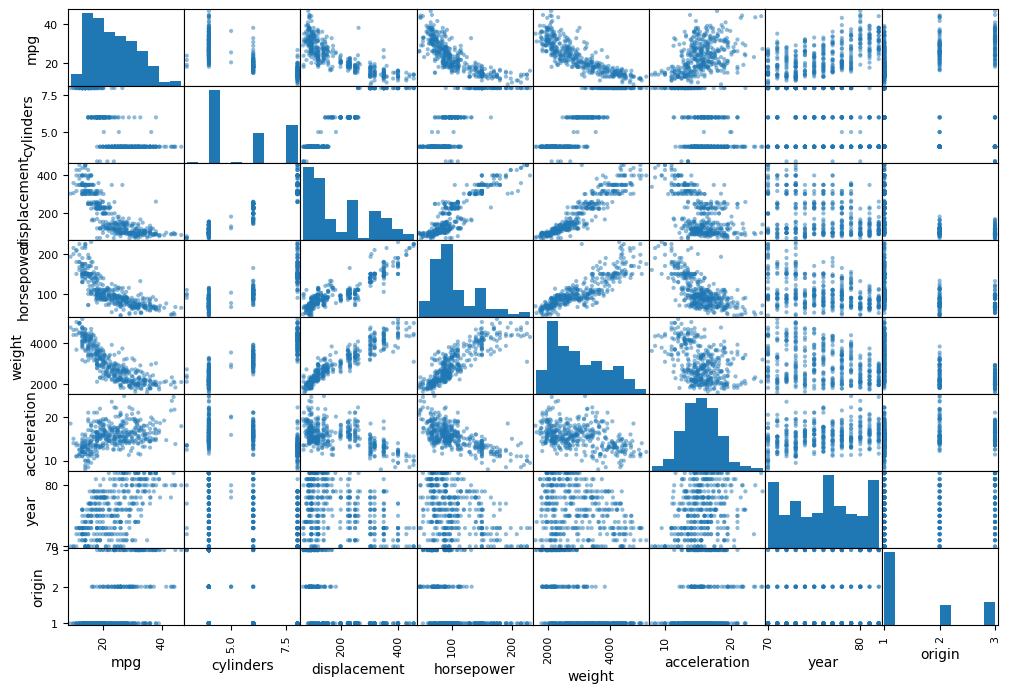

In [69]:
# produce a scatter plot of the predictors
pd.plotting.scatter_matrix(auto_df, figsize=(12, 8))
# produce a correlation matric of the predictors
display(auto_df.corr())

In [82]:
pd.set_option('display.float_format', '{:.4f}'.format)

# create multiple regression on all predictors

# create Y variable
q9_y = auto_df['mpg']

# create our predictors (x)
q9_x = auto_df.drop(columns=['mpg']).copy()
q9_x.insert(0, 'intercept', 1)  # Remove the assignment here

# train the model 
model = sm.OLS(q9_y, q9_x)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.6440,-3.7070,0.0000
cylinders,-0.4934,0.3230,-1.5260,0.1280
displacement,0.0199,0.0080,2.6470,0.0080
horsepower,-0.0170,0.0140,-1.2300,0.2200
weight,-0.0065,0.0010,-9.9290,0.0000
acceleration,0.0806,0.0990,0.8150,0.4150
year,0.7508,0.0510,14.7290,0.0000
origin,1.4261,0.2780,5.1270,0.0000


In [ ]:
#is there a relationship between the predictors and the outcome variable? 
from statsmodels.stats.anova import anova_lm

print("Overall model F-test:")
print(f"F-statistic: {results.fvalue}")
print(f"p-value: {results.f_pvalue}")

Overall model F-test:
F-statistic: 252.42804529131925
p-value: 2.0371059307545127e-139


A F statistic essentially helps tell us how much variance our model helps explain. A larger number the better. Here the model explains a lot, does a lot better than the average. 

Pvalue test the hypothesis that none of our predictors matter. Here all of them seem to matter, reject the null hypothesis. 

What does the year coefficient mean? 
* A 7.51e-01 coefficient or 0.751 mean that for every year on average we get 0.751 more MPG. Intuitively makes sense.

Which variables not significant? 
* Cylinders, although we might think more cylinders should have worse MPG as technology goes on you could have maybe even better MPG. Very high P value. Same with horsepower. 


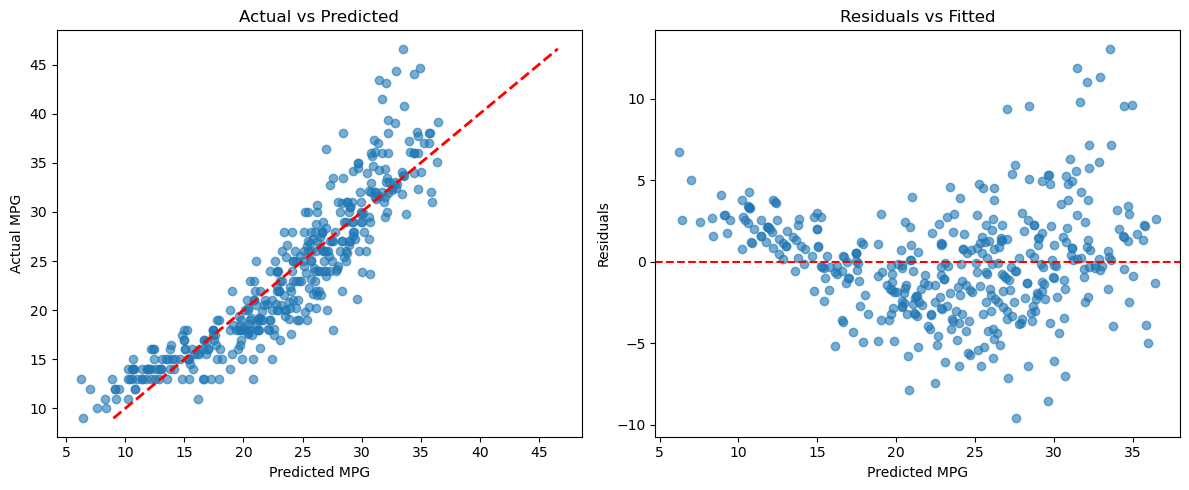

In [86]:
import matplotlib.pyplot as plt
# Plot 1: Actual vs Predicted
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(results.fittedvalues, q9_y, alpha=0.6)
plt.plot([q9_y.min(), q9_y.max()], [q9_y.min(), q9_y.max()], 'r--', lw=2)
plt.xlabel('Predicted MPG')
plt.ylabel('Actual MPG')
plt.title('Actual vs Predicted')

# Plot 2: Residuals vs Fitted
plt.subplot(1, 2, 2)
plt.scatter(results.fittedvalues, results.resid, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

plt.tight_layout()
plt.show()

There seems to be a slight curve in the scatter plot, lets try adding some polynomials to the model, do not have constant variance of the errors. 

In [87]:
# lets create a custom model, dropping none significant parameters and adding polynomial terms to fit the data